In [1]:
# Import the dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

581

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d08339cde13a61017ca266493f003657


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | berlevag
Processing Record 2 of Set 1 | karauzyak
City not found. Skipping...
Processing Record 3 of Set 1 | atasu
Processing Record 4 of Set 1 | kahului
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | almeria
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | aquiraz
Processing Record 12 of Set 1 | lagoa
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 15 of Set 1 | batagay
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | saint george
Processing Record 20 of Set 1 | albany
Processing Record 21 

Processing Record 35 of Set 4 | aflu
City not found. Skipping...
Processing Record 36 of Set 4 | bandarbeyla
Processing Record 37 of Set 4 | cidreira
Processing Record 38 of Set 4 | ixtapa
Processing Record 39 of Set 4 | nome
Processing Record 40 of Set 4 | bathsheba
Processing Record 41 of Set 4 | tiksi
Processing Record 42 of Set 4 | ouesso
Processing Record 43 of Set 4 | cockburn town
Processing Record 44 of Set 4 | paamiut
Processing Record 45 of Set 4 | grindavik
Processing Record 46 of Set 4 | lavrentiya
Processing Record 47 of Set 4 | moose factory
Processing Record 48 of Set 4 | airai
Processing Record 49 of Set 4 | castro
Processing Record 50 of Set 4 | dekoa
City not found. Skipping...
Processing Record 1 of Set 5 | san andres
Processing Record 2 of Set 5 | richards bay
Processing Record 3 of Set 5 | chapais
Processing Record 4 of Set 5 | trairi
Processing Record 5 of Set 5 | mozhga
Processing Record 6 of Set 5 | kavieng
Processing Record 7 of Set 5 | winslow
Processing Recor

Processing Record 21 of Set 8 | maunabo
Processing Record 22 of Set 8 | saint anthony
Processing Record 23 of Set 8 | geraldton
Processing Record 24 of Set 8 | samarai
Processing Record 25 of Set 8 | bere
Processing Record 26 of Set 8 | karimganj
Processing Record 27 of Set 8 | provideniya
Processing Record 28 of Set 8 | nanortalik
Processing Record 29 of Set 8 | hurghada
Processing Record 30 of Set 8 | sorvag
City not found. Skipping...
Processing Record 31 of Set 8 | shimoda
Processing Record 32 of Set 8 | sur
Processing Record 33 of Set 8 | nueva loja
Processing Record 34 of Set 8 | karasburg
Processing Record 35 of Set 8 | makurdi
Processing Record 36 of Set 8 | bilibino
Processing Record 37 of Set 8 | kalomo
City not found. Skipping...
Processing Record 38 of Set 8 | srivardhan
Processing Record 39 of Set 8 | chernyshevskiy
Processing Record 40 of Set 8 | pasighat
Processing Record 41 of Set 8 | brownsville
Processing Record 42 of Set 8 | cumaribo
City not found. Skipping...
Proce

Processing Record 9 of Set 12 | berbera
Processing Record 10 of Set 12 | estrela
Processing Record 11 of Set 12 | seaford
Processing Record 12 of Set 12 | ulladulla
Processing Record 13 of Set 12 | keshabpur
Processing Record 14 of Set 12 | hirara
Processing Record 15 of Set 12 | palmer
Processing Record 16 of Set 12 | taltal
Processing Record 17 of Set 12 | harper
Processing Record 18 of Set 12 | nuevo progreso
Processing Record 19 of Set 12 | kalinovskaya
Processing Record 20 of Set 12 | komsomolskiy
Processing Record 21 of Set 12 | santo domingo
Processing Record 22 of Set 12 | springfield
Processing Record 23 of Set 12 | sarkand
Processing Record 24 of Set 12 | varhaug
Processing Record 25 of Set 12 | kankakee
Processing Record 26 of Set 12 | hovd
Processing Record 27 of Set 12 | chekhov
Processing Record 28 of Set 12 | le mars
Processing Record 29 of Set 12 | sinegorye
Processing Record 30 of Set 12 | lampazos de naranjo
Processing Record 31 of Set 12 | batemans bay
--------------

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Berlevag,70.8578,29.0864,46.35,93,90,5.75,NO,2021-07-28 07:12:24
1,Atasu,48.6814,71.6433,75.00,22,0,5.57,KZ,2021-07-28 07:12:24
2,Kahului,20.8947,-156.4700,77.85,86,40,17.27,US,2021-07-28 07:12:24
3,Atuona,-9.8000,-139.0333,78.08,71,5,17.92,PF,2021-07-28 07:12:25
4,Vaini,-21.2000,-175.2000,69.96,78,75,8.05,TO,2021-07-28 07:12:25
5,Almeria,37.1667,-2.3333,77.14,48,0,0.78,ES,2021-07-28 07:12:26
6,Puerto Ayora,-0.7393,-90.3518,71.26,85,52,9.17,EC,2021-07-28 07:12:26
7,Aquiraz,-3.9014,-38.3911,78.89,88,13,9.98,BR,2021-07-28 07:09:28
8,Lagoa,39.0500,-27.9833,70.99,87,100,8.93,PT,2021-07-28 07:12:27
9,Hilo,19.7297,-155.0900,73.80,94,90,0.00,US,2021-07-28 07:12:27


In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Berlevag,NO,2021-07-28 07:12:24,70.8578,29.0864,46.35,93,90,5.75
1,Atasu,KZ,2021-07-28 07:12:24,48.6814,71.6433,75.00,22,0,5.57
2,Kahului,US,2021-07-28 07:12:24,20.8947,-156.4700,77.85,86,40,17.27
3,Atuona,PF,2021-07-28 07:12:25,-9.8000,-139.0333,78.08,71,5,17.92
4,Vaini,TO,2021-07-28 07:12:25,-21.2000,-175.2000,69.96,78,75,8.05
5,Almeria,ES,2021-07-28 07:12:26,37.1667,-2.3333,77.14,48,0,0.78
6,Puerto Ayora,EC,2021-07-28 07:12:26,-0.7393,-90.3518,71.26,85,52,9.17
7,Aquiraz,BR,2021-07-28 07:09:28,-3.9014,-38.3911,78.89,88,13,9.98
8,Lagoa,PT,2021-07-28 07:12:27,39.0500,-27.9833,70.99,87,100,8.93
9,Hilo,US,2021-07-28 07:12:27,19.7297,-155.0900,73.80,94,90,0.00


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

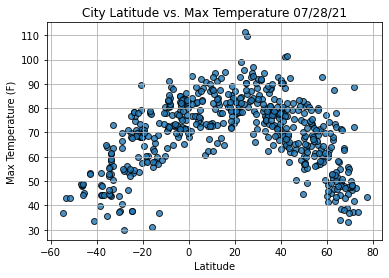

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

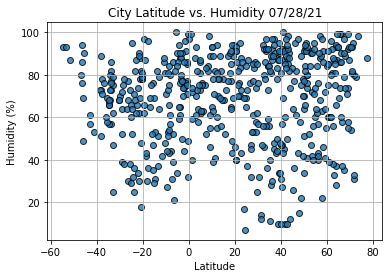

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

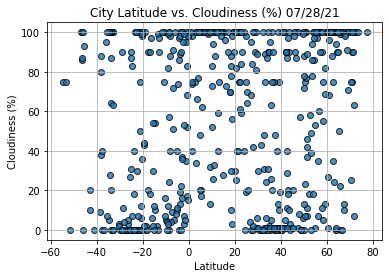

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

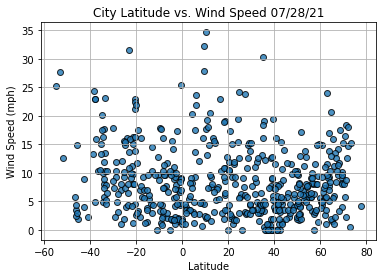

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
index13 = city_data_df.loc[13]
index13

City                        Kapaa
Country                        US
Date          2021-07-28 07:12:29
Lat                       22.0752
Lng                      -159.319
Max Temp                    80.92
Humidity                       76
Cloudiness                     75
Wind Speed                   1.01
Name: 13, dtype: object

In [17]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
525     True
526     True
527     True
528     True
529    False
Name: Lat, Length: 530, dtype: bool

In [18]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Berlevag,NO,2021-07-28 07:12:24,70.8578,29.0864,46.35,93,90,5.75
1,Atasu,KZ,2021-07-28 07:12:24,48.6814,71.6433,75.00,22,0,5.57
2,Kahului,US,2021-07-28 07:12:24,20.8947,-156.4700,77.85,86,40,17.27
5,Almeria,ES,2021-07-28 07:12:26,37.1667,-2.3333,77.14,48,0,0.78
8,Lagoa,PT,2021-07-28 07:12:27,39.0500,-27.9833,70.99,87,100,8.93


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

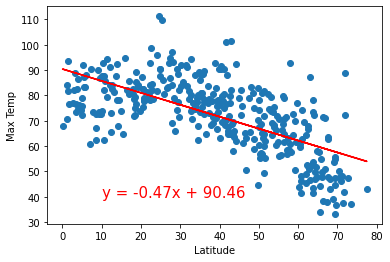

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

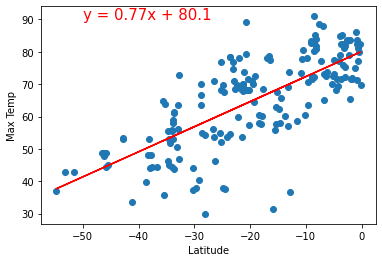

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

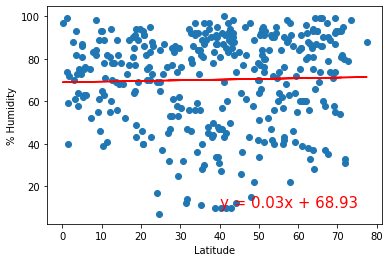

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

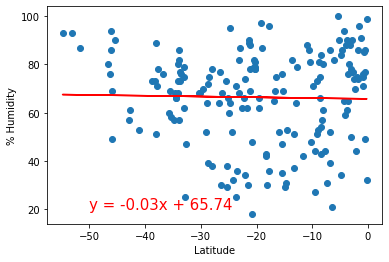

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

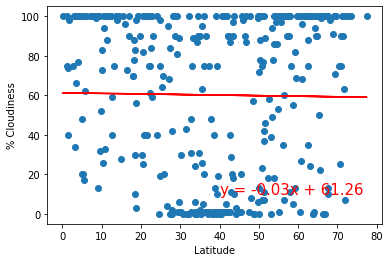

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

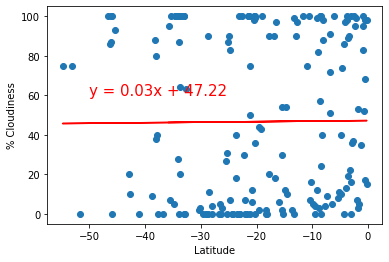

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

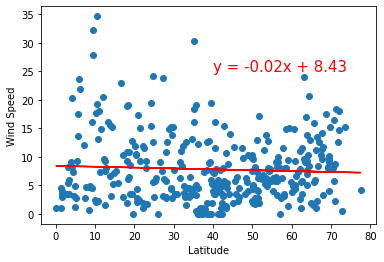

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

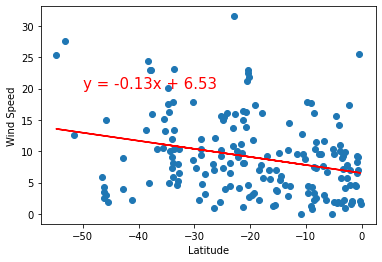

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))